In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

/tmp/ipykernel_13059/912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import torch
import torch.nn as nn
import torchvision
from unet import UNET

In [4]:
model = UNET(in_channels=3, out_channels=1)
ckpt = torch.load("../checkpoint_4_hpu.pth")
model.load_state_dict(ckpt)

<All keys matched successfully>

In [5]:
from PIL import Image
from torchvision import transforms

In [6]:
img = Image.open("../MCUCXR_0083_0.png").convert("RGB")
tsfm = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
img_tensor = tsfm(img)
img_tensor = img_tensor.unsqueeze(0)
img_tensor.shape

torch.Size([1, 3, 256, 256])

In [7]:
x = model(img_tensor)

In [8]:
preds = (torch.sigmoid(x) > 0.5).float()
# torchvision.utils.save_image(preds, "some.png")

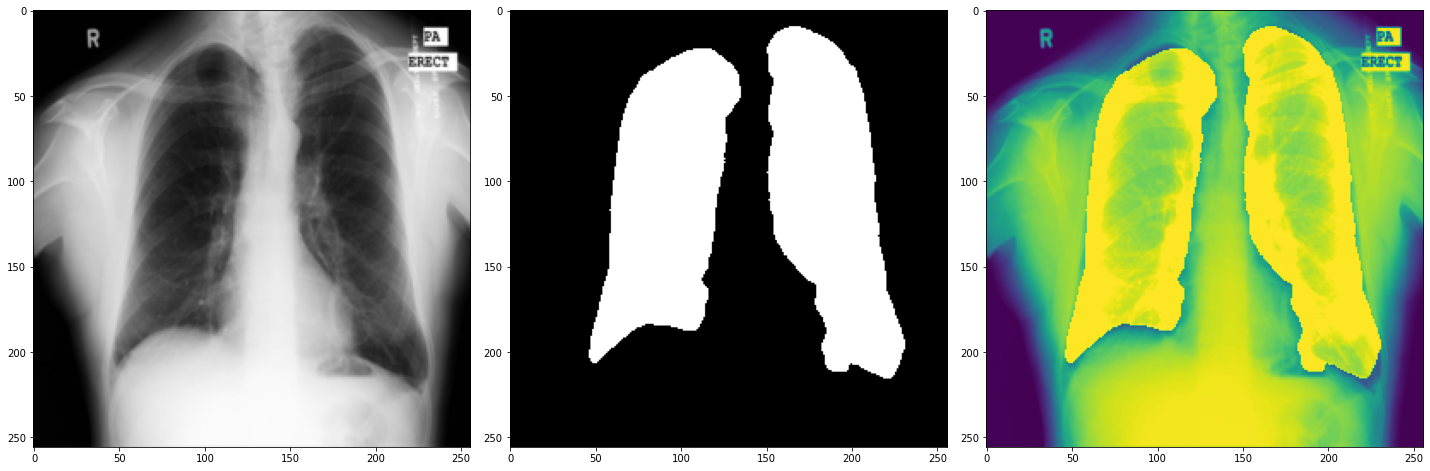

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
img = transforms.ToPILImage()(img_tensor.squeeze())
mask = transforms.ToPILImage()(preds.squeeze())
axis[0].imshow(img)
axis[1].imshow(mask, cmap="gray")
axis[2].imshow(cv2.addWeighted(np.array(img)[..., 2], 1.0, np.array(mask), 0.7, 1))
plt.tight_layout()

In [13]:
cv2.imwrite(
    "ssss.png", cv2.addWeighted(np.array(img)[..., 2], 1.0, np.array(mask), 0.7, 1)
)

True